# Análisis exploratorio de datos
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
sns.set_theme()

In [90]:
# En caso de no tener funcional cartopy.feature usamos estas lineas
# !wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
# !python cartopy_feature_download.py physical
# !python cartopy_feature_download.py cultural

--2023-06-13 15:40:47--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6,2K) [text/plain]
Saving to: ‘cartopy_feature_download.py’

cartopy_feature_dow 100%[===================>]   6,18K  --.-KB/s    in 0s      

2023-06-13 15:40:48 (142 MB/s) - ‘cartopy_feature_download.py’ saved [6332/6332]

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
Feature physical, coastline, 110m length: 134
Feature physic

In [2]:
db12_prep = pd.read_csv('/home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition/db12_prep.csv')
db12_prep

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


## Definimos tipos de variables
---

In [68]:
# Definimos las variables categoricas
categorical = ['A_dom', 'A_reg', 'A_cont'] 
# Definimos las variables numericas
numeric = ['q', 'elevation', 'sedthick']
# Variables geoespaciales
coords = ['lat', 'lng']
temporal = 'A_year'

## Análisis Global
---
Inicialmente se realizará una exploración global. 

### Correlaciones entre datos
---

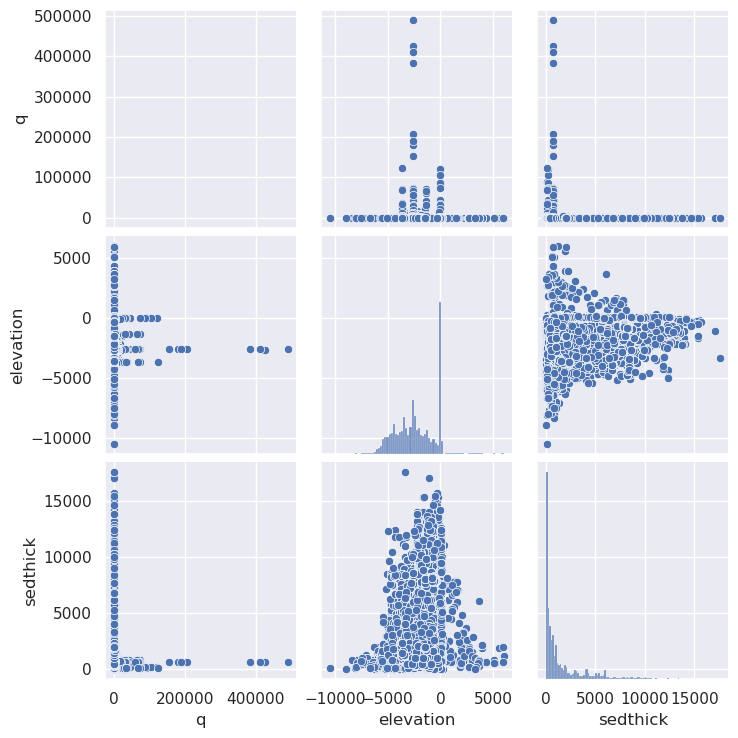

In [69]:
# Genera un pair plot para las columnas numéricas del DataFrame db12_prep
sns.pairplot(db12_prep[numeric])

### Calidad de los datos
---

Text(0, 0.5, 'N')

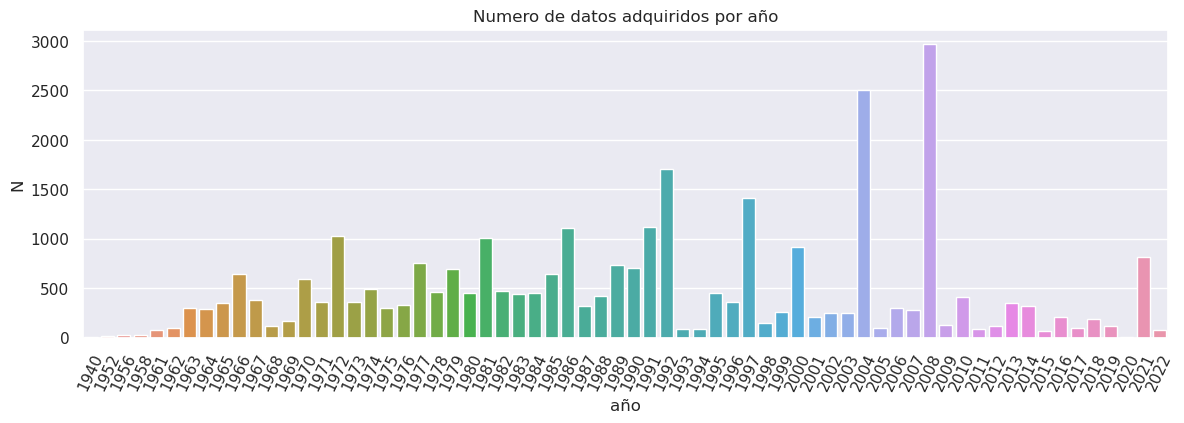

In [71]:
# Agrupar los datos por ano y contar la frecuencia
time_series_frec = db12_prep.groupby(temporal).size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(14, 4))
sns.barplot(x=time_series_frec.index, y=time_series_frec.values)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=65)
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

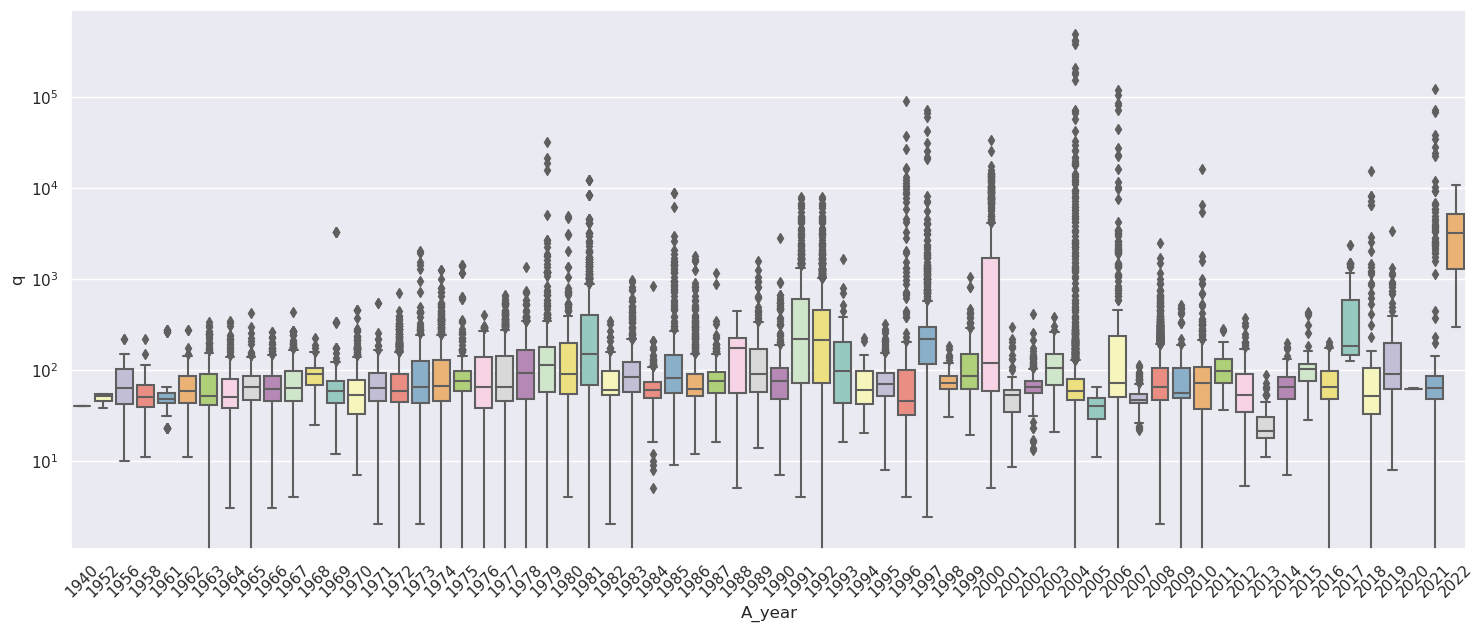

In [72]:
# Crear una figura con un tamaño personalizado (18 pulgadas de ancho, 7 pulgadas de alto)
fig = plt.figure(figsize=(18,7))
# Generar un gráfico de caja utilizando los datos de db12_prep
sns.boxplot(x=temporal, y="q",
                 data=db12_prep, 
                 palette="Set3")
# Rotar las etiquetas del eje x
plt.xticks(rotation=45);
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')

Text(0, 0.5, 'N')

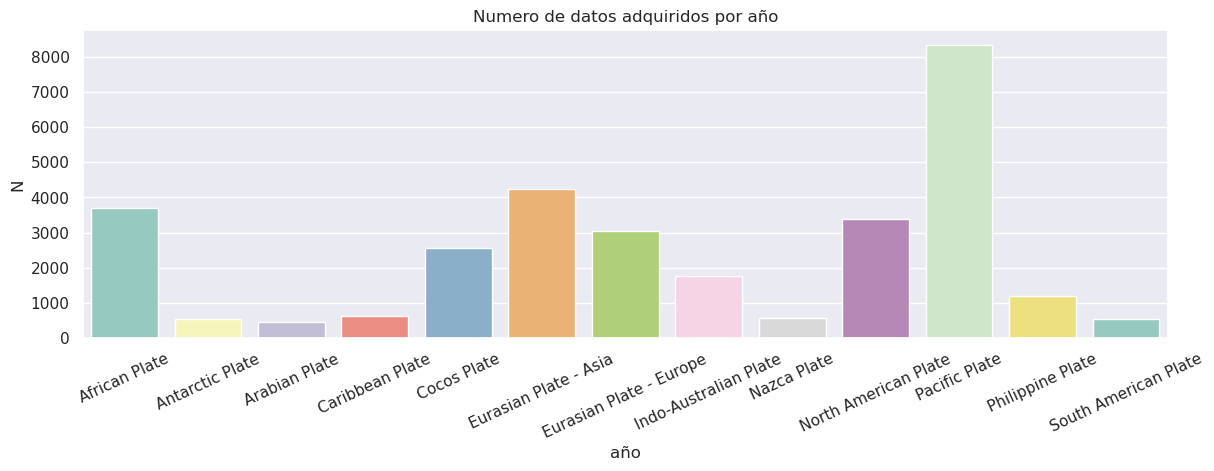

In [59]:
# Agrupar los datos por ano y contar la frecuencia
cont_frec = db12_prep.groupby('A_cont').size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(14, 4))
sns.barplot(x=cont_frec.index, y=cont_frec.values, 
                 palette="Set3",)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=25)
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

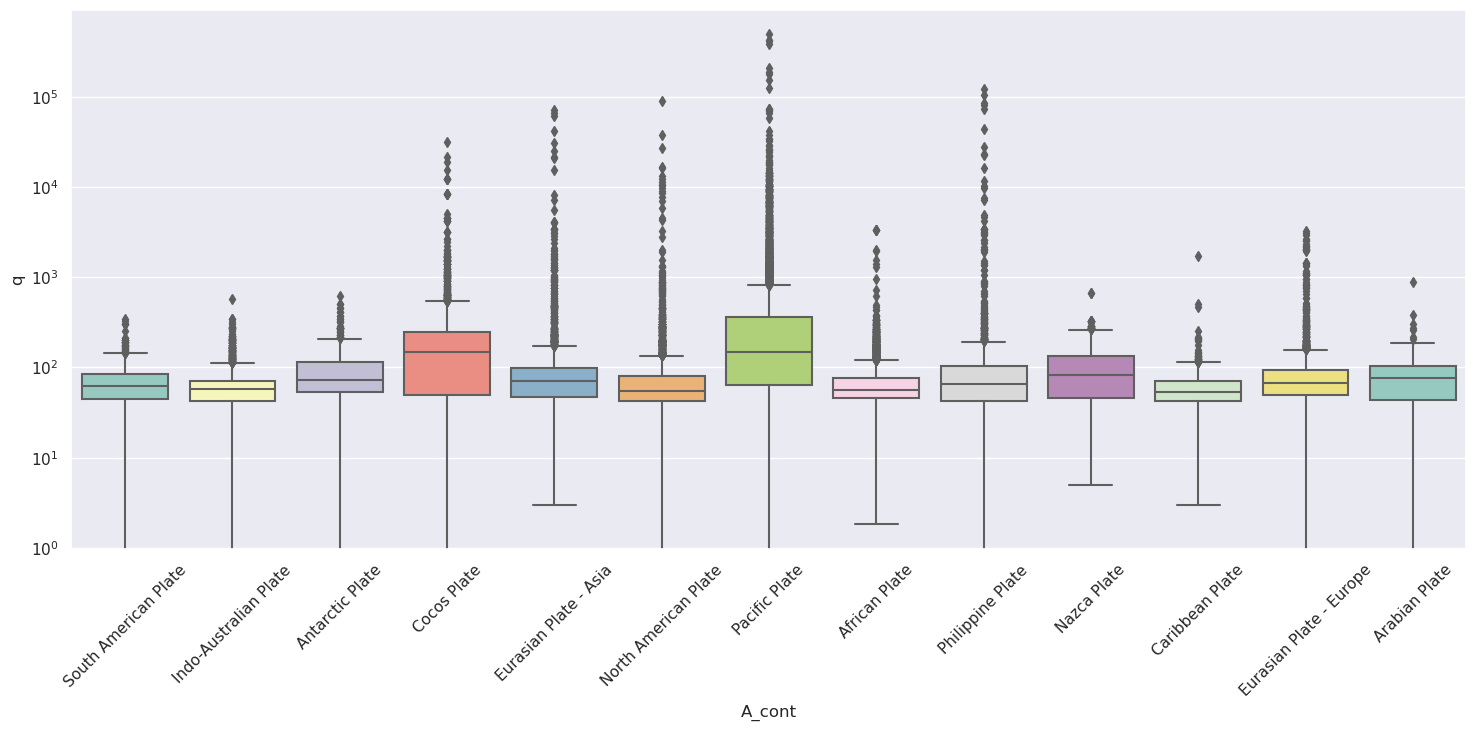

In [58]:
# Crear una figura con un tamaño personalizado 
fig = plt.figure(figsize=(18,7))
# Generar un gráfico de caja utilizando los datos de db12_prep
sns.boxplot(x="A_cont", y="q",
                 data=db12_prep, 
                 palette="Set3")
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')
# Rotar las etiquetas del eje x
plt.xticks(rotation=45);

Text(0, 0.5, 'N')

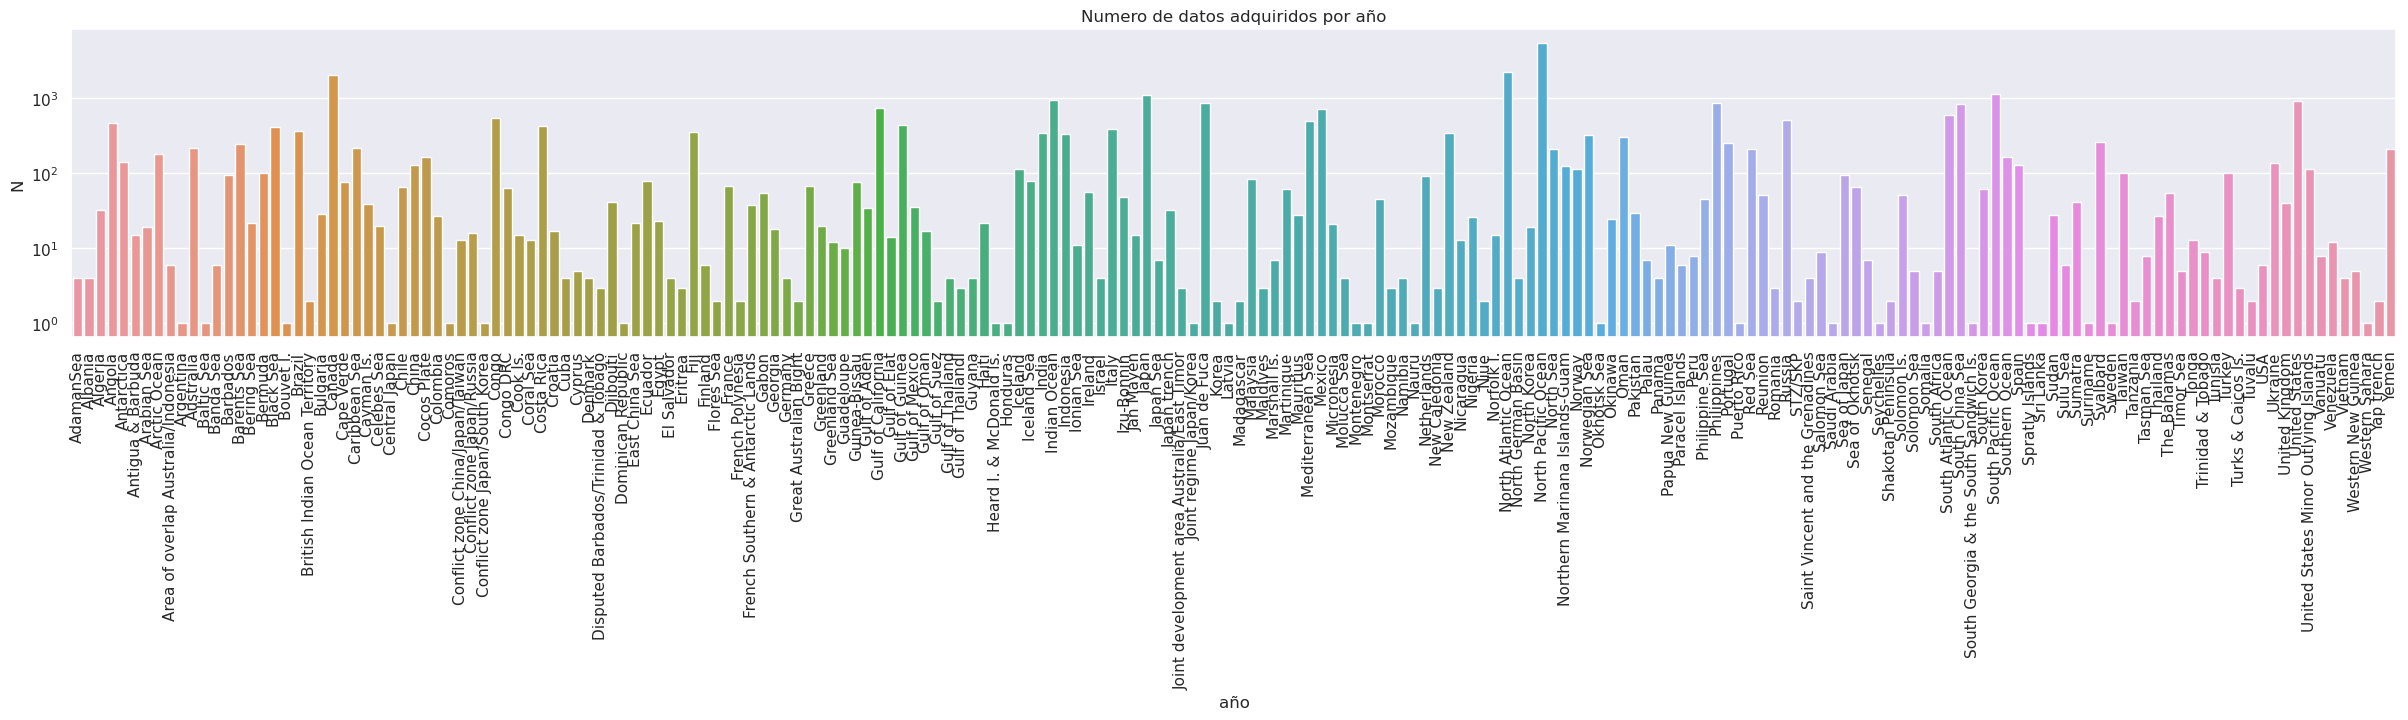

In [64]:
# Agrupar los datos por ano y contar la frecuencia
reg_frec = db12_prep.groupby('A_reg').size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(30, 4))
sns.barplot(x=reg_frec.index, y=reg_frec.values)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=90)
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, 'Mapa de datos de flujo de calor')

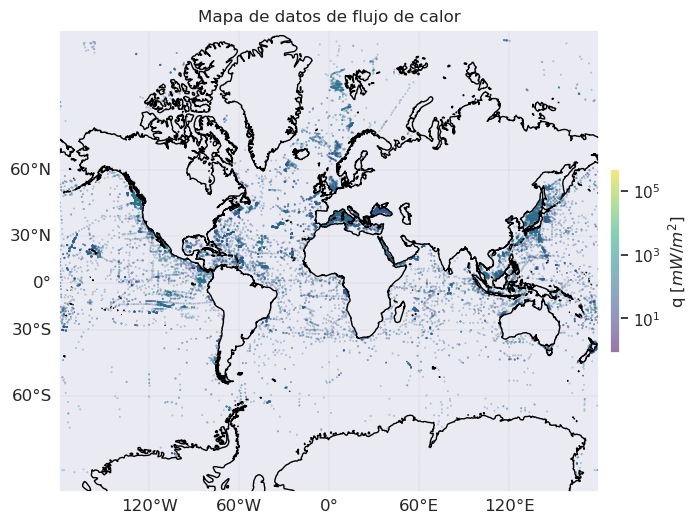

In [81]:
# Crear una figura y un eje utilizando la proyección cartopy
fig = plt.figure(figsize=(14, 6))
# Definimos el codigo de proyeccion
epsg_code = 3395
# Definimos el sistema de referencia proyectado en ax
ax = plt.axes(projection=ccrs.epsg(epsg_code))
# Trazar los puntos en el mapa utilizando scatter
scater_map = ax.scatter(db12_prep['lng'], db12_prep['lat'], c=db12_prep['q'], 
           cmap='viridis', norm=colors.LogNorm(), s=0.1, alpha=0.5, transform=ccrs.PlateCarree())
# Agregar barra de colores
cbar = plt.colorbar(scater_map, label=r'q [$mW/m^2$]', pad=0.01, shrink=0.4)
# Agregar características del mapa, como la costa y los límites del país
ax.coastlines(resolution='50m')
# Agrega reticula
gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Titulo
ax.set_title('Mapa de datos de flujo de calor')

## Análisis local (Colombia)
---
Posteriormente se realiza la exploración para Colombia

### Correlación entre datos
---

In [66]:
# db12_prep_col = db12_prep[db12_prep['A_reg']=='Colombia']
cont_values = ['Nazca Plate', 'Cocos Plate']  # List of math values to filter

db12_prep_col = db12_prep[db12_prep['A_cont'].isin(cont_values)]

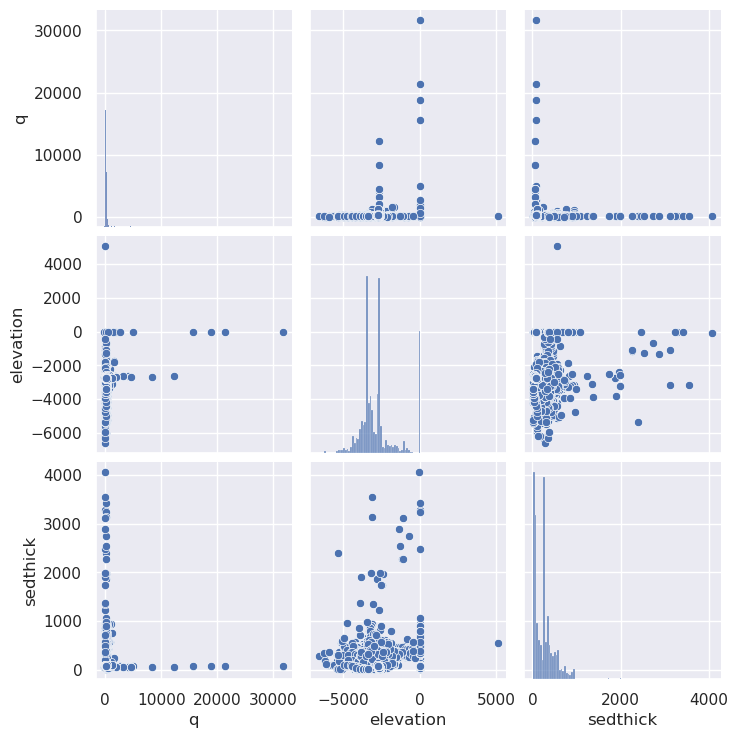

In [73]:
sns.pairplot(db12_prep_col[numeric])

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


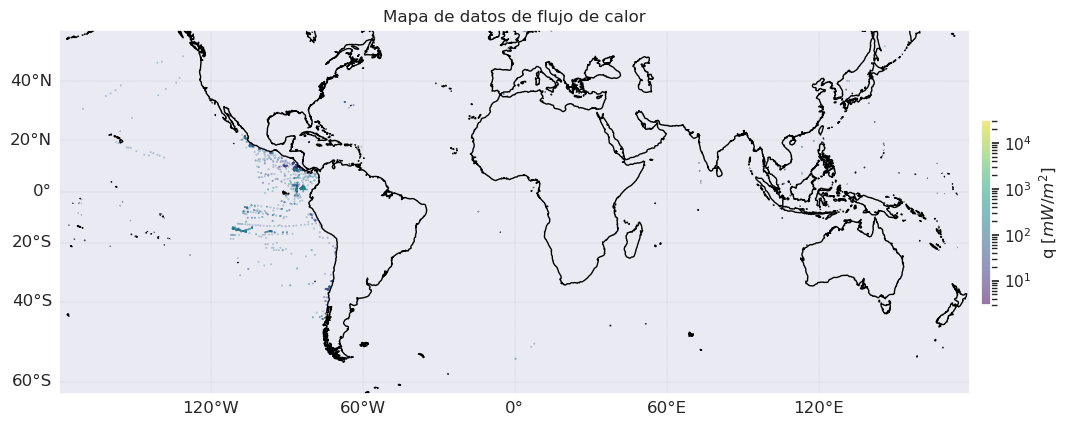

In [82]:
# Crear una figura y un eje utilizando la proyección cartopy
fig = plt.figure(figsize=(14, 6))
# Definimos el codigo de proyeccion
epsg_code = 3395
# Definimos el sistema de referencia proyectado en ax
ax = plt.axes(projection=ccrs.epsg(epsg_code))
# Trazar los puntos en el mapa utilizando scatter
scater_map = ax.scatter(db12_prep_col['lng'], db12_prep_col['lat'], c=db12_prep_col['q'], 
           cmap='viridis', norm=colors.LogNorm(), s=0.1, alpha=0.5, transform=ccrs.PlateCarree())
# Agregar barra de colores
cbar = plt.colorbar(scater_map, label=r'q [$mW/m^2$]', pad=0.01, shrink=0.4)
# Agregar características del mapa, como la costa y los límites del país
ax.coastlines(resolution='50m')
# Agrega reticula
gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Titulo
ax.set_title('Mapa de datos de flujo de calor')
# Establecer el área de visualización
# [min_longitud, max_longitud, min_latitud, max_latitud]
min_lon, max_lon = db12_prep_col['lng'].min(), db12_prep_col['lng'].max()
min_lat, max_lat = db12_prep_col['lat'].min(), db12_prep_col['lat'].max()
extent = [min_lon, max_lon, min_lat, max_lat]  
ax.set_extent(extent)


## Análisis de datos anómalos
---

Text(0.5, 1.0, 'Box Plot')

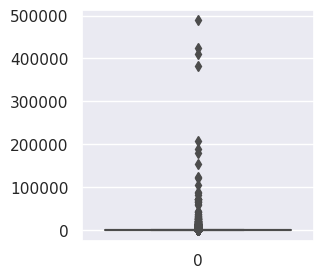

In [87]:
# Set the figure size
plt.figure(figsize=(3, 3))
# Create the box plot
sns.boxplot(db12_prep['q'])
# Customize the plot if needed
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')